# **Time Seris Prophet**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import time 
import matplotlib.pyplot as plt

# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
item_cat="item_categories.csv"
item="items.csv"
sub="sample_submission.csv"
sales="sales_train.csv"
shop="shops.csv"
test="test.csv"

sales=pd.read_csv(sales,sep=',')
item_cat=pd.read_csv(item_cat,sep=',')
item=pd.read_csv(item,sep=',')
sub=pd.read_csv(sub,sep=',')
shop=pd.read_csv(shop,sep=',')
test=pd.read_csv(test,sep=',')

In [3]:
sales['date']=pd.to_datetime(sales['date'],format='%d.%m.%Y')
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


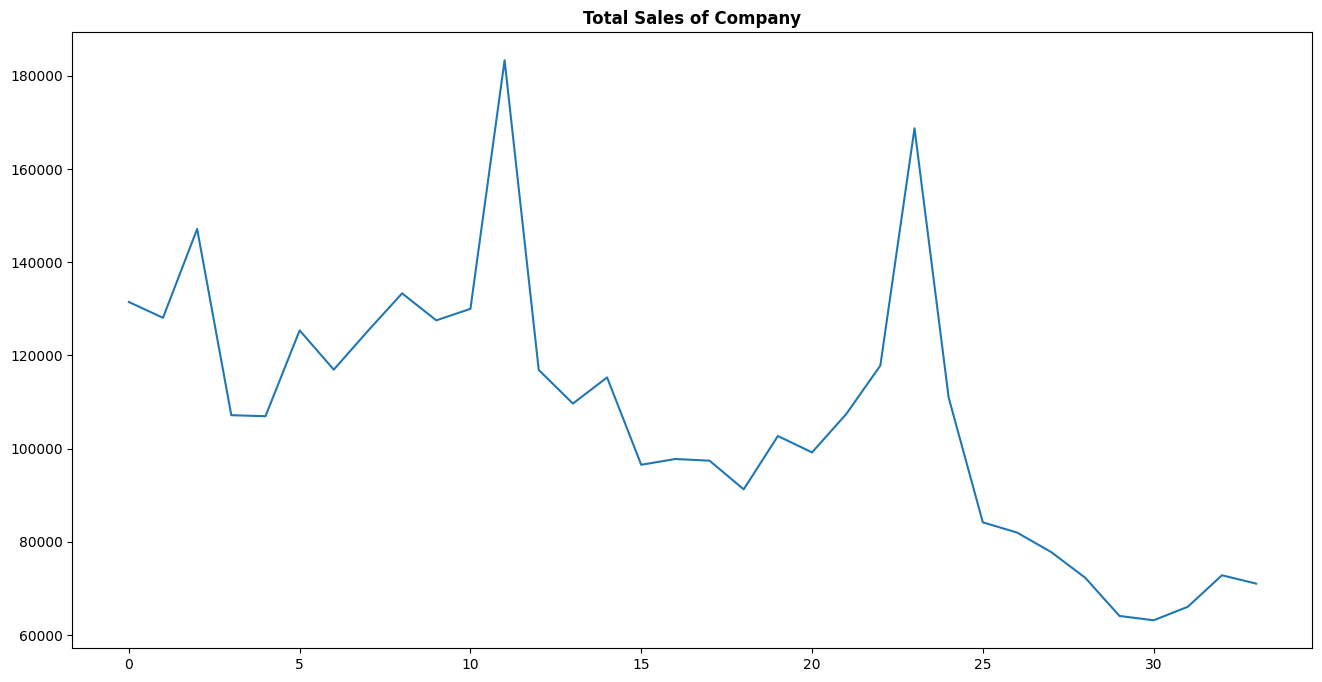

In [4]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
plt.figure(figsize=(16,8))
plt.plot(ts)
plt.title('Total Sales of Company',fontsize=12,weight='bold')
plt.show()

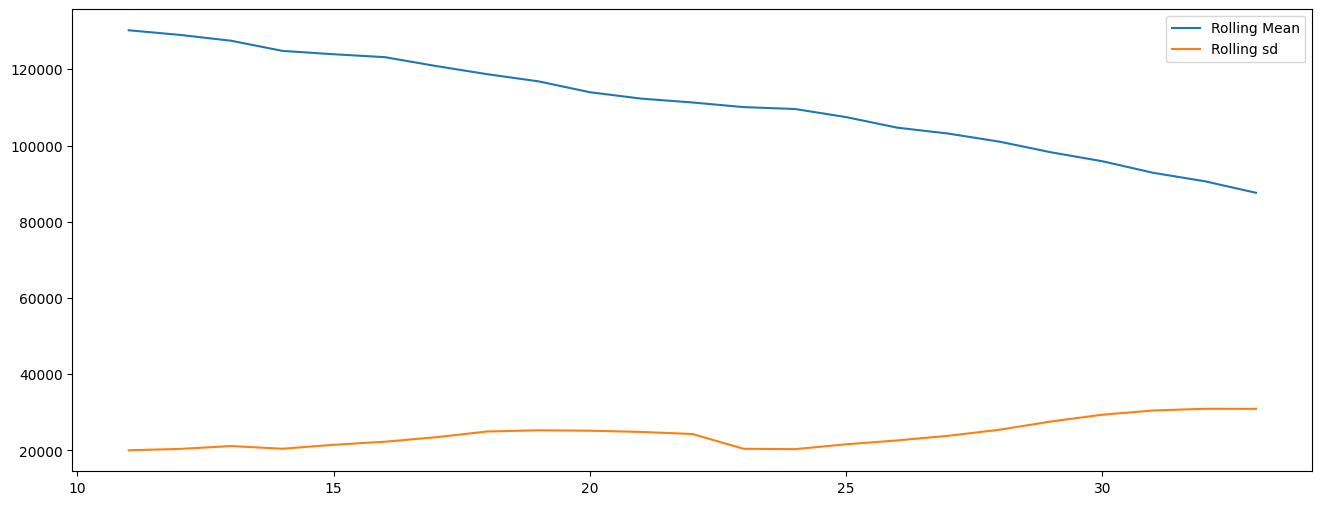

In [5]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend()
plt.show()

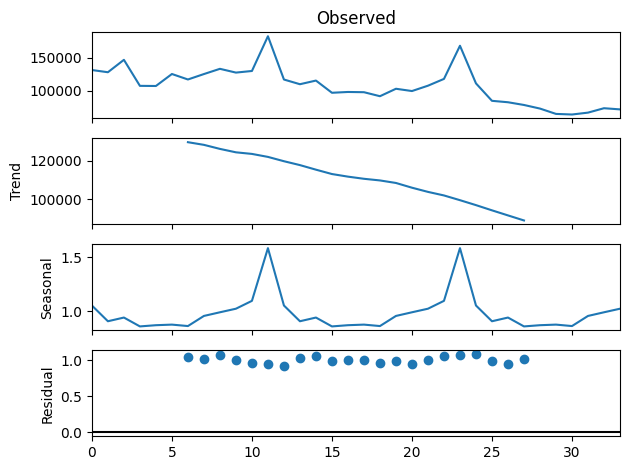

In [10]:
res = sm.tsa.seasonal_decompose(ts.values,period=12,model="multiplicative")
fig = res.plot()

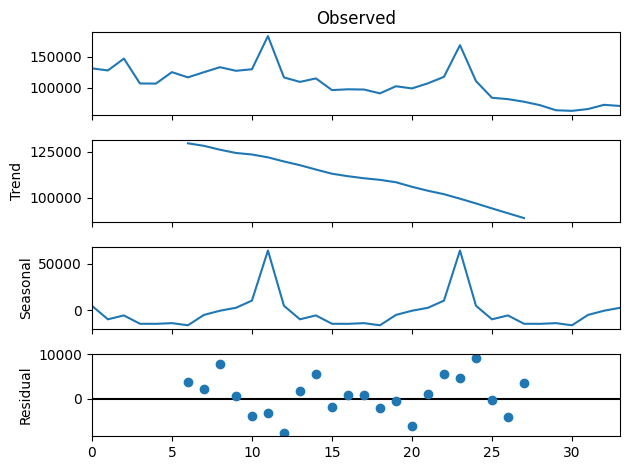

In [11]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,period=12,model="additive")
fig = res.plot()

In [15]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [17]:
Prueba_Dickey_Fuller(ts,"date_block_num")

Resultados de la prueba de Dickey-Fuller para columna: date_block_num
Test Statistic                        -2.395704
p-value                                0.142953
No Lags Used                           0.000000
Número de observaciones utilizadas    33.000000
Critical Value (1%)                   -3.646135
Critical Value (5%)                   -2.954127
Critical Value (10%)                  -2.615968
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [18]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
ts=ts.reset_index()
ts.head()

,index,item_cnt_day
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


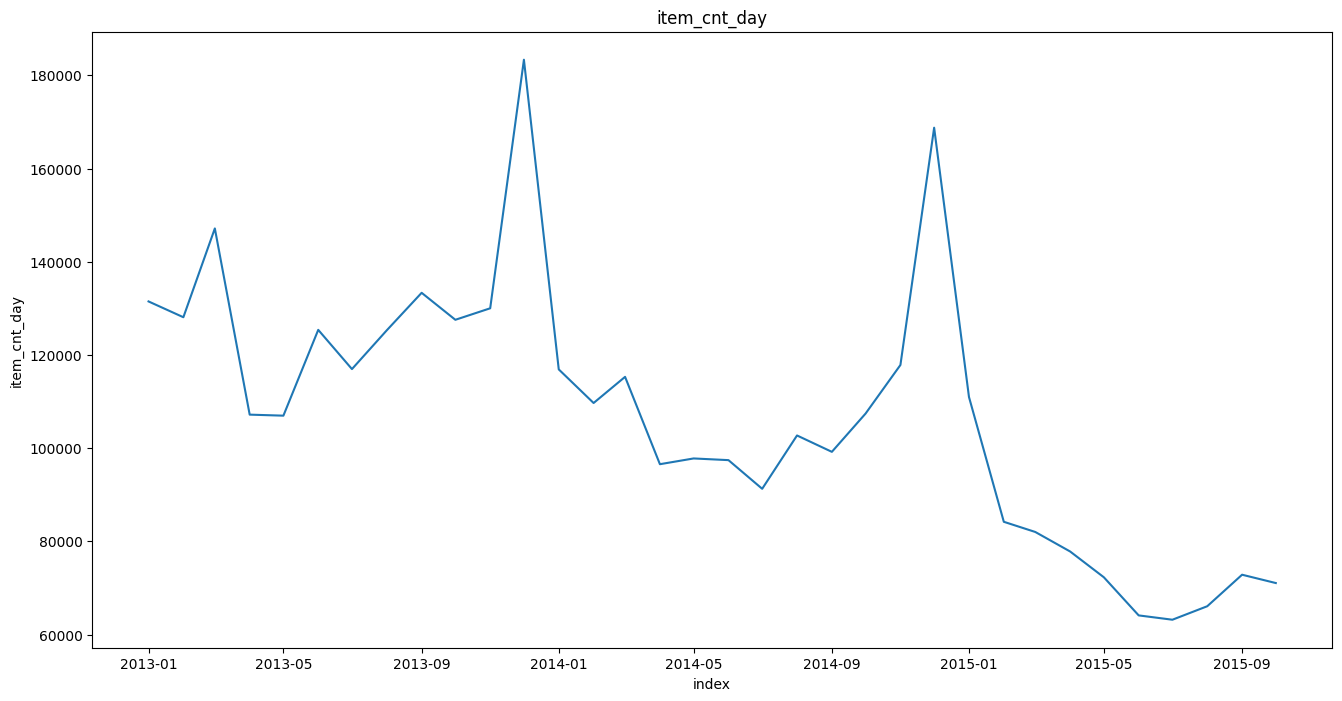

In [21]:
plt.figure(figsize=(16,8))
sns.lineplot(data=ts,y='item_cnt_day',x='index')
plt.title('item_cnt_day')
plt.show()

In [24]:
from prophet import Prophet

In [25]:
ts.columns=['ds','y']
model = Prophet( yearly_seasonality=True) #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(ts)

09:24:16 - cmdstanpy - INFO - Chain [1] start processing
09:24:16 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = model.make_future_dataframe(periods = 5, freq = 'MS')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,83193.967492,80156.649106,86336.601531
35,2015-12-01,125513.233012,122161.751347,128772.823077
36,2016-01-01,75625.686507,72483.636605,78895.206366
37,2016-02-01,40109.308303,37116.013259,43061.275314
38,2016-03-01,76664.068718,73709.870483,79929.245283


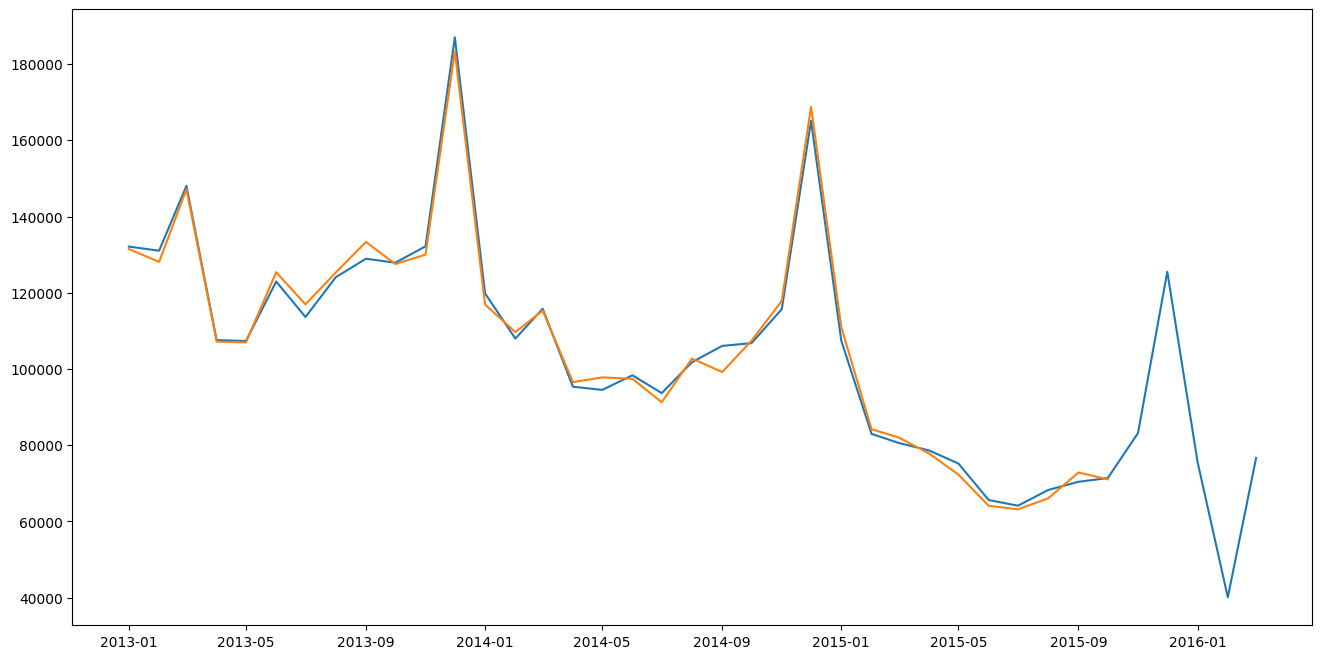

In [32]:
plt.figure(figsize=(16,8))
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(ts['ds'],ts['y'])
plt.show()

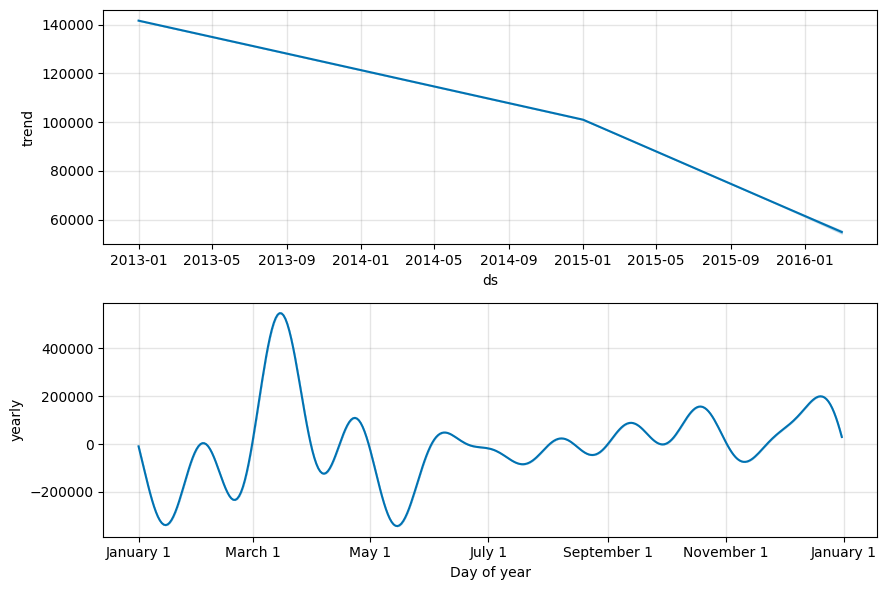

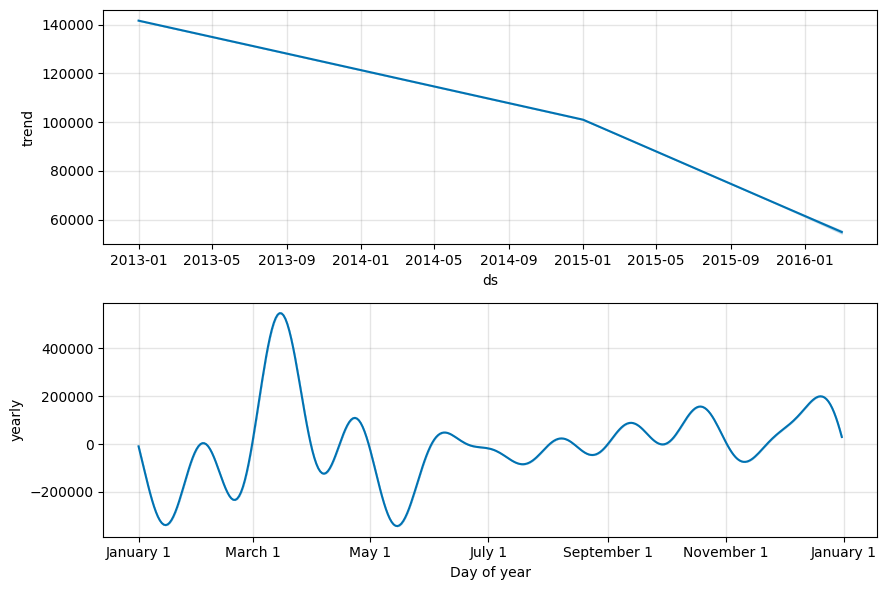

In [33]:
model.plot_components(forecast)

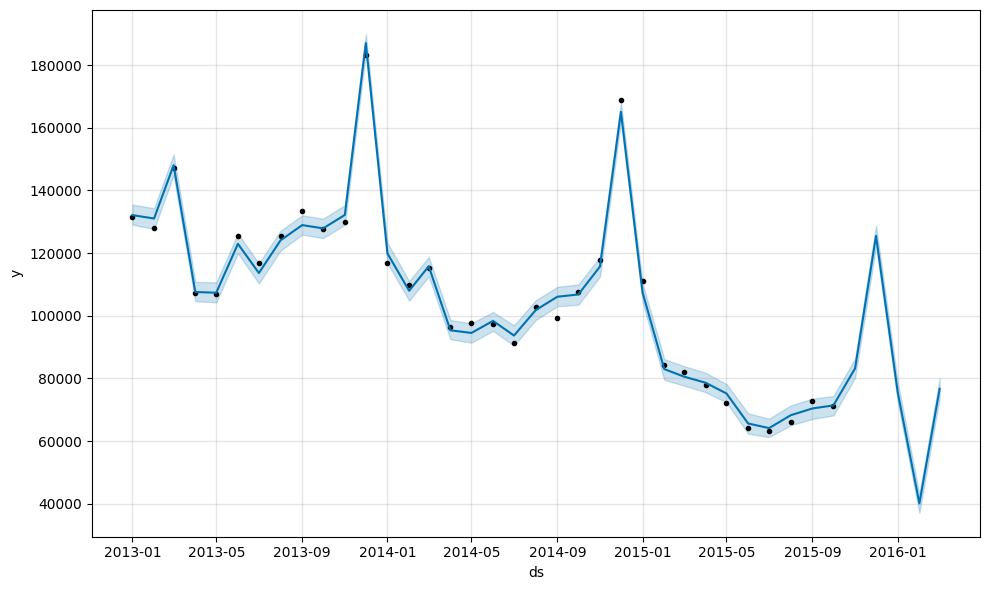

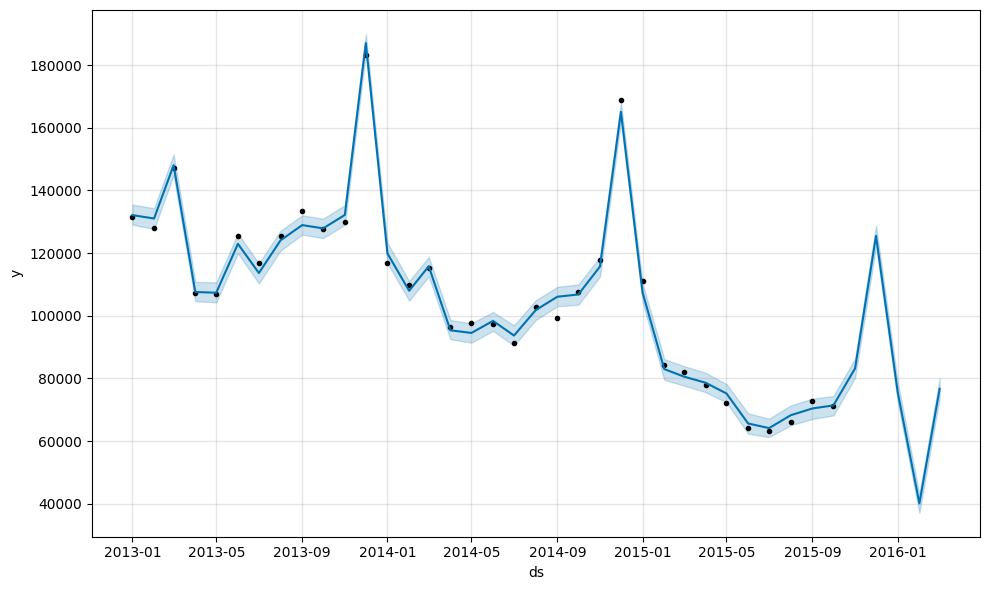

In [34]:
model.plot(forecast)